# Word Cloud

- Show most frequent words
- word cloud

# 1)- Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import numpy as np 
import pickle
import pandas as pd 

#For Visuals
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

Populating the interactive namespace from numpy and matplotlib


# 2)- Load data

In [3]:
import pickle
#Loading from firm cleaned file
dataset = pd.read_pickle('sentiment_self_drive.pkl')
dataset.shape

(6943, 2)

In [4]:
dataset.head()

,text,sent_numeric
0,Two places I'd invest all my money if I could:...,Beneficial
1,Awesome! Google driverless cars will help the ...,Beneficial
2,If Google maps can't keep up with road constru...,Risky
3,Autonomous cars seem way overhyped given the t...,Risky
4,Just saw Google self-driving car on I-34. It w...,Neutral


In [5]:
dataset.shape

(6943, 2)

In [6]:
dataset.sent_numeric.value_counts()

Neutral       4245
Beneficial    1903
Risky          795
Name: sent_numeric, dtype: int64

In [7]:
dataset.isnull().sum()

text            0
sent_numeric    0
dtype: int64

# 3)- Text data descriptive analysis

### 3.1)-Most common and uncommon words

In [8]:
#Identify top 20 most common/frequently occuring words
common = pd.Series(' '.join(dataset['text']).split()).value_counts()[:20]
common

the             2820
car             2197
a               2123
to              2063
cars            1926
self-driving    1840
driving         1529
Google          1464
in              1322
of              1299
driverless      1233
self            1206
I               1206
and              977
is               944
on               916
for              818
be               693
will             589
The              500
dtype: int64

### 3.2)- Most uncommon words

In [9]:
#Identify top 20 uncommon words
uncommon=pd.Series(' '.join(dataset['text']).split()).value_counts()[-20:]
uncommon

dealership.                    1
#Zomato                        1
http://t.co/k3UuQyj8cq         1
edit                           1
(regulatory                    1
Eleanor                        1
http://t.co/0cRY59oNx2̢����    1
http://t.co/bsCI2xl5EG̢����    1
anymore?                       1
ones.̢����                     1
@moonpolysoft                  1
commit                         1
fine,                          1
destroying                     1
sales:                         1
investing:                     1
@jonny_pain                    1
stages                         1
#lovenuitblanch                1
#auto̢����                     1
dtype: int64

# 4)- Text Preprocessing
- clean-up
- shrink vocab
- reduce sparsity

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [11]:
# for noise removal

import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# STOPWORDS

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [13]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;#]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z +_]')
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['rt', 'http']) # extend stopwords; rt means re-tweet
STOPWORDS = set(STOPWORDS)

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwords from text
    text = text.strip()
    return text

In [14]:
dataset['cleaned']=[text_prepare(x) for x in dataset['text']]

# 5)-Word Cloud Visualization

### 5.1)- Word cloud for clean dataset

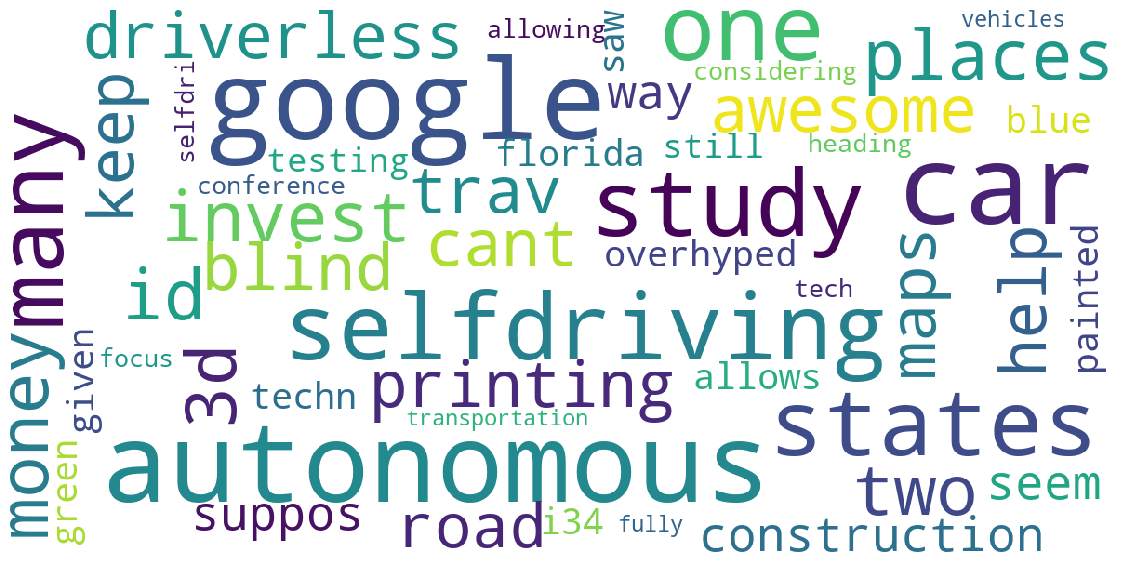

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 50 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(dataset['cleaned'].dropna())

### 5.2)-Word cloud for original dataset

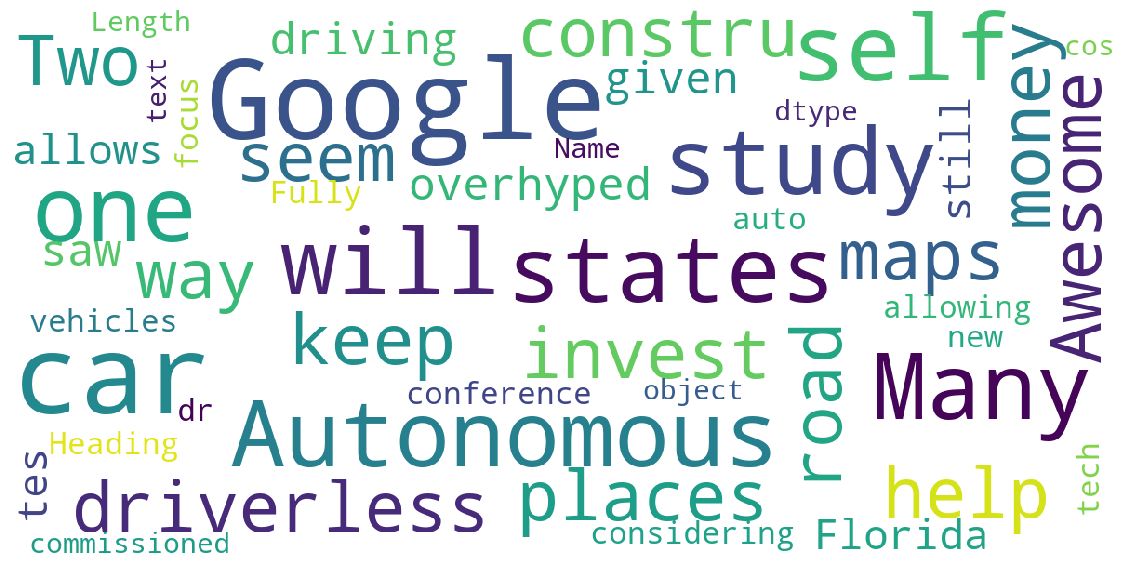

In [16]:
Mywordcloud(dataset['text'].dropna())

### 5.3)- Word cloud for Risky sentiments

In [17]:
dataset.head()

,text,sent_numeric,cleaned
0,Two places I'd invest all my money if I could:...,Beneficial,two places id invest money could 3d printing s...
1,Awesome! Google driverless cars will help the ...,Beneficial,awesome google driverless cars help blind trav...
2,If Google maps can't keep up with road constru...,Risky,google maps cant keep road construction suppos...
3,Autonomous cars seem way overhyped given the t...,Risky,autonomous cars seem way overhyped given techn...
4,Just saw Google self-driving car on I-34. It w...,Neutral,saw google selfdriving car i34 painted green blue


In [18]:
r=dataset

In [19]:
r=r[r.sent_numeric=='Risky']

In [20]:
r.shape

(795, 3)

In [21]:
r.head()

,text,sent_numeric,cleaned
2,If Google maps can't keep up with road constru...,Risky,google maps cant keep road construction suppos...
3,Autonomous cars seem way overhyped given the t...,Risky,autonomous cars seem way overhyped given techn...
9,Driverless cars are not worth the risk. Don't...,Risky,driverless cars worth risk dont want highway s...
64,@ChunkaMui The ripple effects of the autonomou...,Risky,chunkamui ripple effects autonomous car far re...
67,@andyfatbastard they̢���re doing a good job o...,Risky,andyfatbastard theyre good job implying autono...


In [22]:
r.isnull().sum()

text            0
sent_numeric    0
cleaned         0
dtype: int64

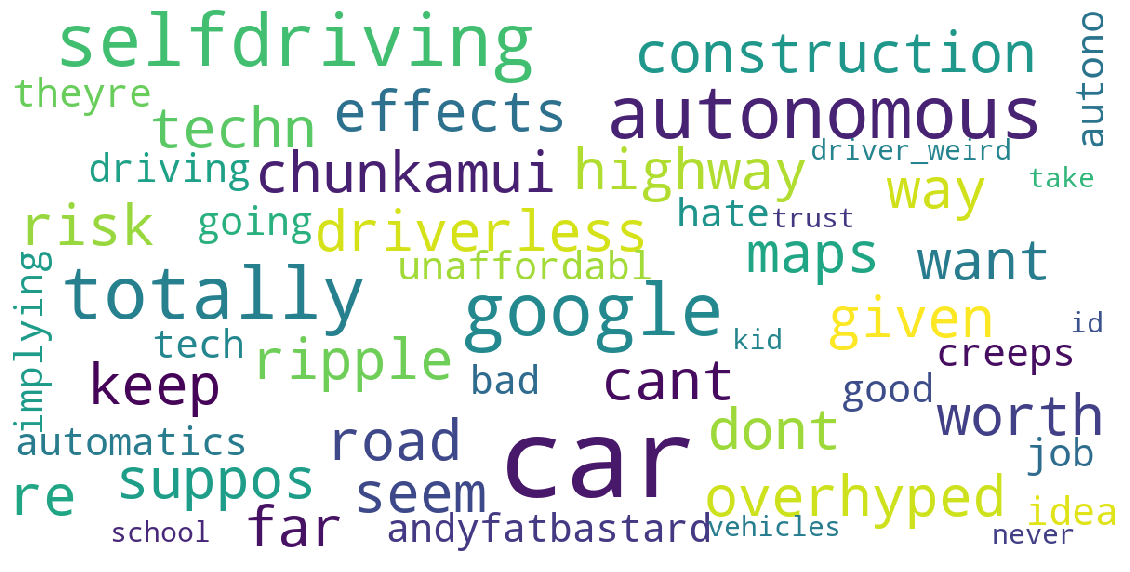

In [23]:
Mywordcloud(r['cleaned'].dropna())

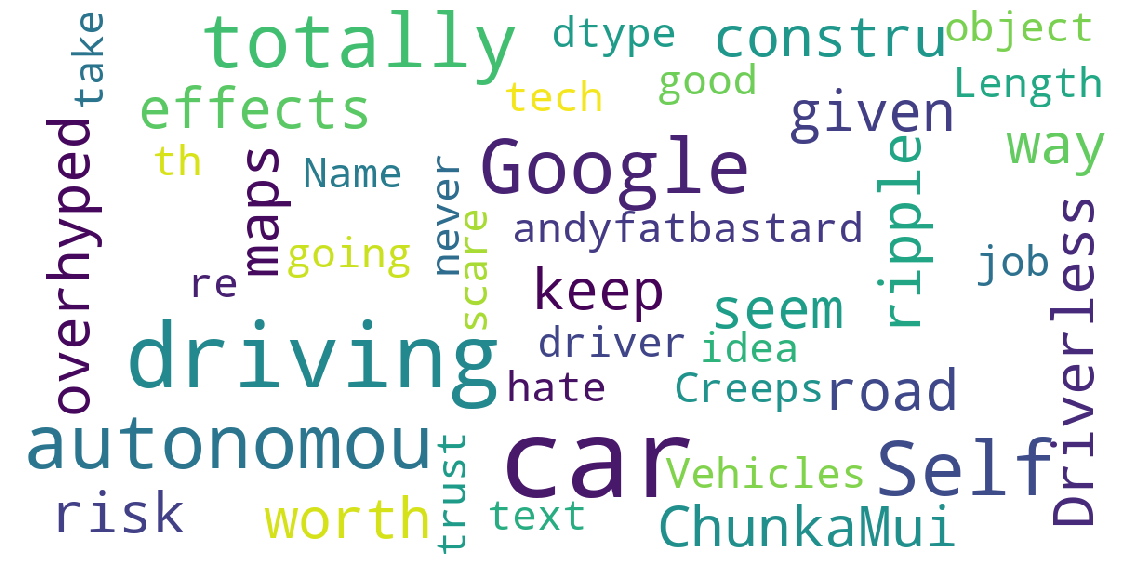

In [24]:
Mywordcloud(r['text'].dropna())

### 5.4)- Word cloud for Benefit sentiments

In [25]:
b=dataset

In [26]:
b=b[b.sent_numeric=='Beneficial']

In [27]:
b.shape

(1903, 3)

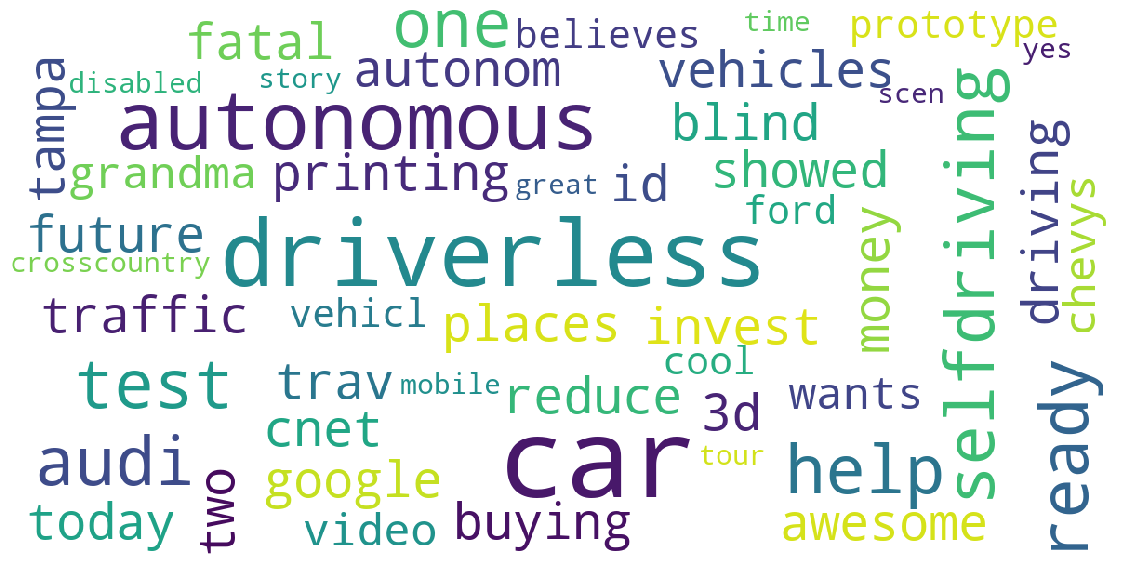

In [28]:
Mywordcloud(b['cleaned'].dropna())

# END of Notebook